## Load Data

Let's start by adding all existing imports and configuring the plotting colors/style:

In [3]:
!pip install -q -U pandas matplotlib seaborn tqdm
!pip install https://github.com/Lightning-AI/lightning/archive/refs/heads/master.zip -U


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: C:\Users\shijie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: C:\Users\shijie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



     - 0 bytes ? 0:00:00
     - 38.0 kB 2.1 MB/s 0:00:00
     - 292.0 kB 3.7 MB/s 0:00:00
     \ 779.5 kB 7.1 MB/s 0:00:00
     \ 779.5 kB 7.1 MB/s 0:00:00
     | 3.2 MB 14.6 MB/s 0:00:00
     / 4.5 MB 19.2 MB/s 0:00:00
     / 4.5 MB 19.2 MB/s 0:00:00
     - 4.5 MB 19.2 MB/s 0:00:00
     - 4.5 MB 19.2 MB/s 0:00:00
     \ 4.5 MB 19.2 MB/s 0:00:00
     \ 4.5 MB 19.2 MB/s 0:00:00
     | 5.4 MB 9.9 MB/s 0:00:00
     | 8.2 MB 14.6 MB/s 0:00:00
     / 11.5 MB 23.3 MB/s 0:00:00
     / 14.5 MB 63.1 MB/s 0:00:00
     - 15.9 MB 56.5 MB/s 0:00:00
     \ 16.3 MB 42.4 MB/s 0:00:00
     \ 16.6 MB 33.9 MB/s 0:00:00
     | 17.0 MB 30.9 MB/s 0:00:00
     | 17.4 MB 26.5 MB/s 0:00:00
     / 17.9 MB 22.0 MB/s 0:00:00
     / 18.3 MB 20.8 MB/s 0:00:01
     - 18.3 MB 20.8 MB/s 0:00:01
     - 18.3 MB 20.8 MB/s 0:00:01
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finis

In [4]:
!pip install --upgrade pytorch_lightning
!pip install --upgrade lightning_lite
!pip install --upgrade torch



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: C:\Users\shijie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: C:\Users\shijie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: C:\Users\shijie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import re
import sqlite3
from pathlib import Path
 
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
from pytorch_lightning.utilities.seed import seed_everything
from tqdm import tqdm
 
%matplotlib inline
%config InlineBackend.figure_format='retina'
 
COLORS = ["#bae1ff", "#ffb3ba", "#ffdfba", "#ffffba", "#baffc9"]
 
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
sns.set_palette(sns.color_palette(COLORS))
 
cmap = colors.LinearSegmentedColormap.from_list("custom_cmap", COLORS[:2])
 
MY_STYLE = {
    "figure.facecolor": "black",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "axes.linewidth": 0.5,
    "text.color": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "gray",
    "grid.linestyle": "--",
    "grid.linewidth": 0.5,
    "axes.grid": True,
    "xtick.labelsize": "medium",
    "ytick.labelsize": "medium",
    "axes.titlesize": "large",
    "axes.labelsize": "large",
    "lines.color": COLORS[0],
    "patch.edgecolor": "white",
}
 
mpl.rcParams.update(MY_STYLE)
seed_everything(42)

C:\Users\shijie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pytorch_lightning\utilities\seed.py:104: `pytorch_lightning.utilities.seed.seed_everything` has been deprecated in v1.8.0 and will be removed in v1.10.0. Please use `lightning_lite.utilities.seed.seed_everything` instead.
Global seed set to 42


42

Download large files from Google Drive using the gdown library.

In [3]:
!pip install gdown



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: C:\Users\shijie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
!gdown 1R0TQT9ey5Ws7YHc9n3s6EMHrXyMk-VuC   

Downloading...
From: https://drive.google.com/uc?id=1R0TQT9ey5Ws7YHc9n3s6EMHrXyMk-VuC
To: c:\Github-Projects\ML_pipeline\bodyfat.db

  0%|          | 0.00/57.3k [00:00<?, ?B/s]
100%|██████████| 57.3k/57.3k [00:00<00:00, 2.73MB/s]


The Body Fat Extended Dataset comes from Kaggle. To practice real-world techniques commonly used with databases, I'll load the data from a SQLite database using the sqlite3 and pandas libraries. 

In [6]:
connection = sqlite3.connect("bodyfat.db")
df = pd.read_sql_query("SELECT * FROM bodyfat", connection)
df.shape


(436, 16)

## Initial Accessment

In [9]:
df.head()

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,Y,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,Y,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,Y,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,Y,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,Y,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


- BodyFat (percent body fat)
- Original (Y/N if sample comes from the original dataset)
- Sex (M/F)
- Age (years)
- Weight (kg)
- Height (mt)
- Neck (circumference in cm)
- Chest (circumference in cm)
- Abdomen (circumference in cm)
- Hip (circumference in cm)
- Thigh (middle part, circumference in cm)
- Knee (circumference in cm)
- Ankle (circumference in cm)
- Biceps (circumference in cm)
- Forearm (circumference in cm)
- Wrist (circumference in cm)


In [10]:
# delete "Original" column
df = df.drop("Original", axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BodyFat  436 non-null    float64
 1   Sex      436 non-null    object 
 2   Age      436 non-null    int64  
 3   Weight   436 non-null    float64
 4   Height   436 non-null    float64
 5   Neck     436 non-null    float64
 6   Chest    436 non-null    float64
 7   Abdomen  436 non-null    float64
 8   Hip      436 non-null    float64
 9   Thigh    436 non-null    float64
 10  Knee     436 non-null    float64
 11  Ankle    436 non-null    float64
 12  Biceps   436 non-null    float64
 13  Forearm  436 non-null    float64
 14  Wrist    436 non-null    float64
dtypes: float64(13), int64(1), object(1)
memory usage: 51.2+ KB


We have 436 samples and 15 features. There are no missing values, let's check for duplicates:

In [12]:
any(df.duplicated())

False

In [13]:
df.describe()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,20.249839,34.545872,72.282203,1.734048,35.250917,94.158028,82.816055,98.652294,56.039679,37.365596,22.351835,29.897248,26.482110,17.139908
std,7.502125,15.500099,15.464366,0.098359,3.837908,10.931688,14.652729,6.895034,6.194143,2.768403,1.780513,3.944843,3.155306,1.582291
min,0.000000,1.000000,42.184800,0.750000,26.000000,43.000000,58.000000,82.500000,38.000000,24.700000,18.000000,20.500000,20.000000,13.500000
25%,15.022500,21.000000,59.875200,1.668780,31.500000,85.500000,70.000000,94.000000,51.500000,35.400000,21.000000,26.950000,23.700000,16.000000
50%,20.500000,28.500000,70.815800,1.730000,35.450000,93.050000,82.850000,98.300000,56.000000,37.500000,22.300000,29.800000,26.650000,17.300000
75%,25.410000,46.000000,81.560000,1.800000,38.300000,101.425000,93.225000,102.500000,60.000000,39.000000,23.300000,32.625000,29.200000,18.400000
max,47.500000,81.000000,164.720000,1.970000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


## Visualization

Our main split between the data points is the sex of the applicants. Let's have a look at the distribution:

In [23]:
sex_distribution = df["Sex"].value_counts()
sex_distribution

Sex
M    252
F    184
Name: count, dtype: int64

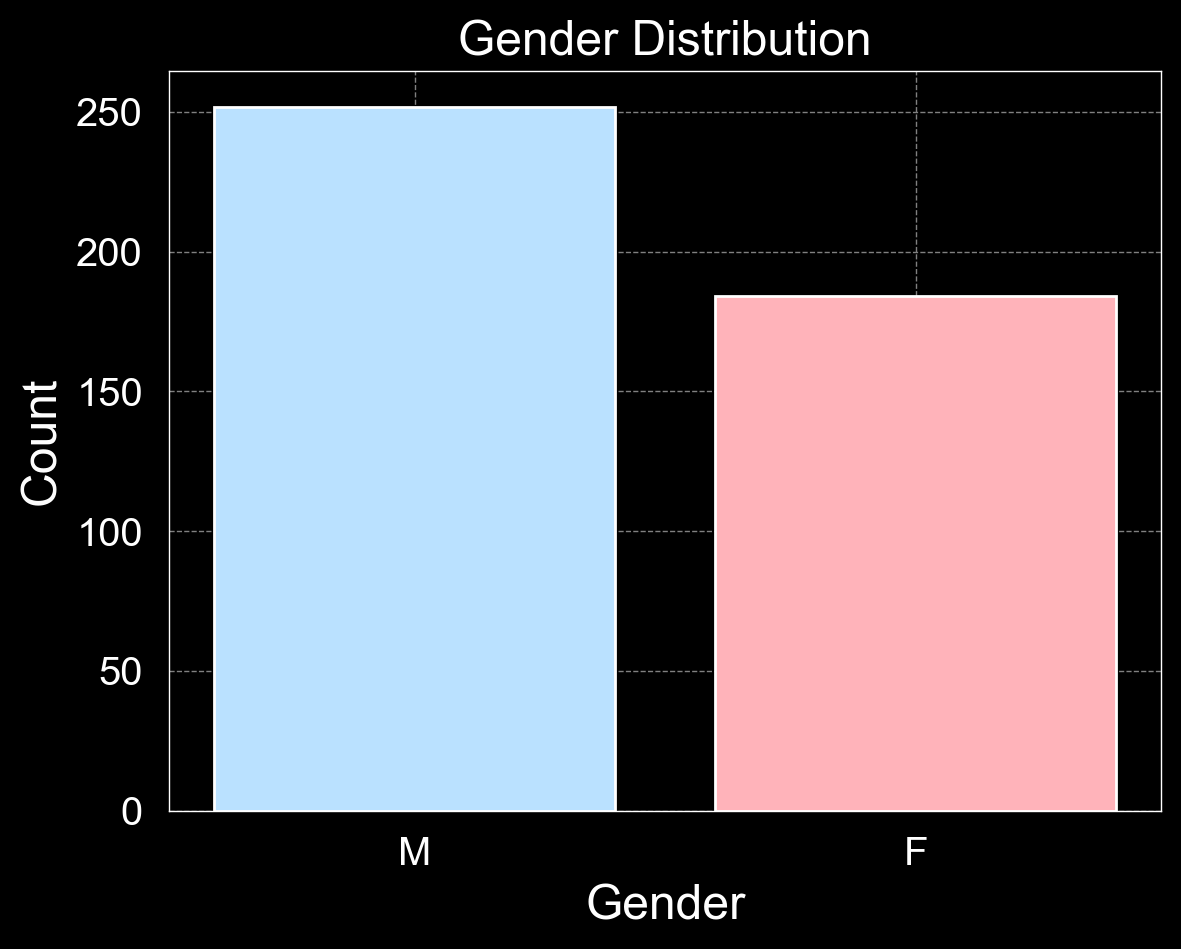

In [24]:
plt.bar(sex_distribution.index, sex_distribution.values, color=COLORS[:2])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show();

The gender split is not quite 50/50, but it's close enough. 

Let's have a look at the distribution of the numerical features. Let's start by creating a helper function to create a grid of plots:

In [25]:
def create_grid(n_rows, n_columns):
    fig, axes = plt.subplots(
        nrows=n_rows, ncols=n_columns, figsize=(n_columns * 5, n_rows * 4)
    )
    return fig, axes.flatten()

We're ready to create a grid of plots for the numerical features:

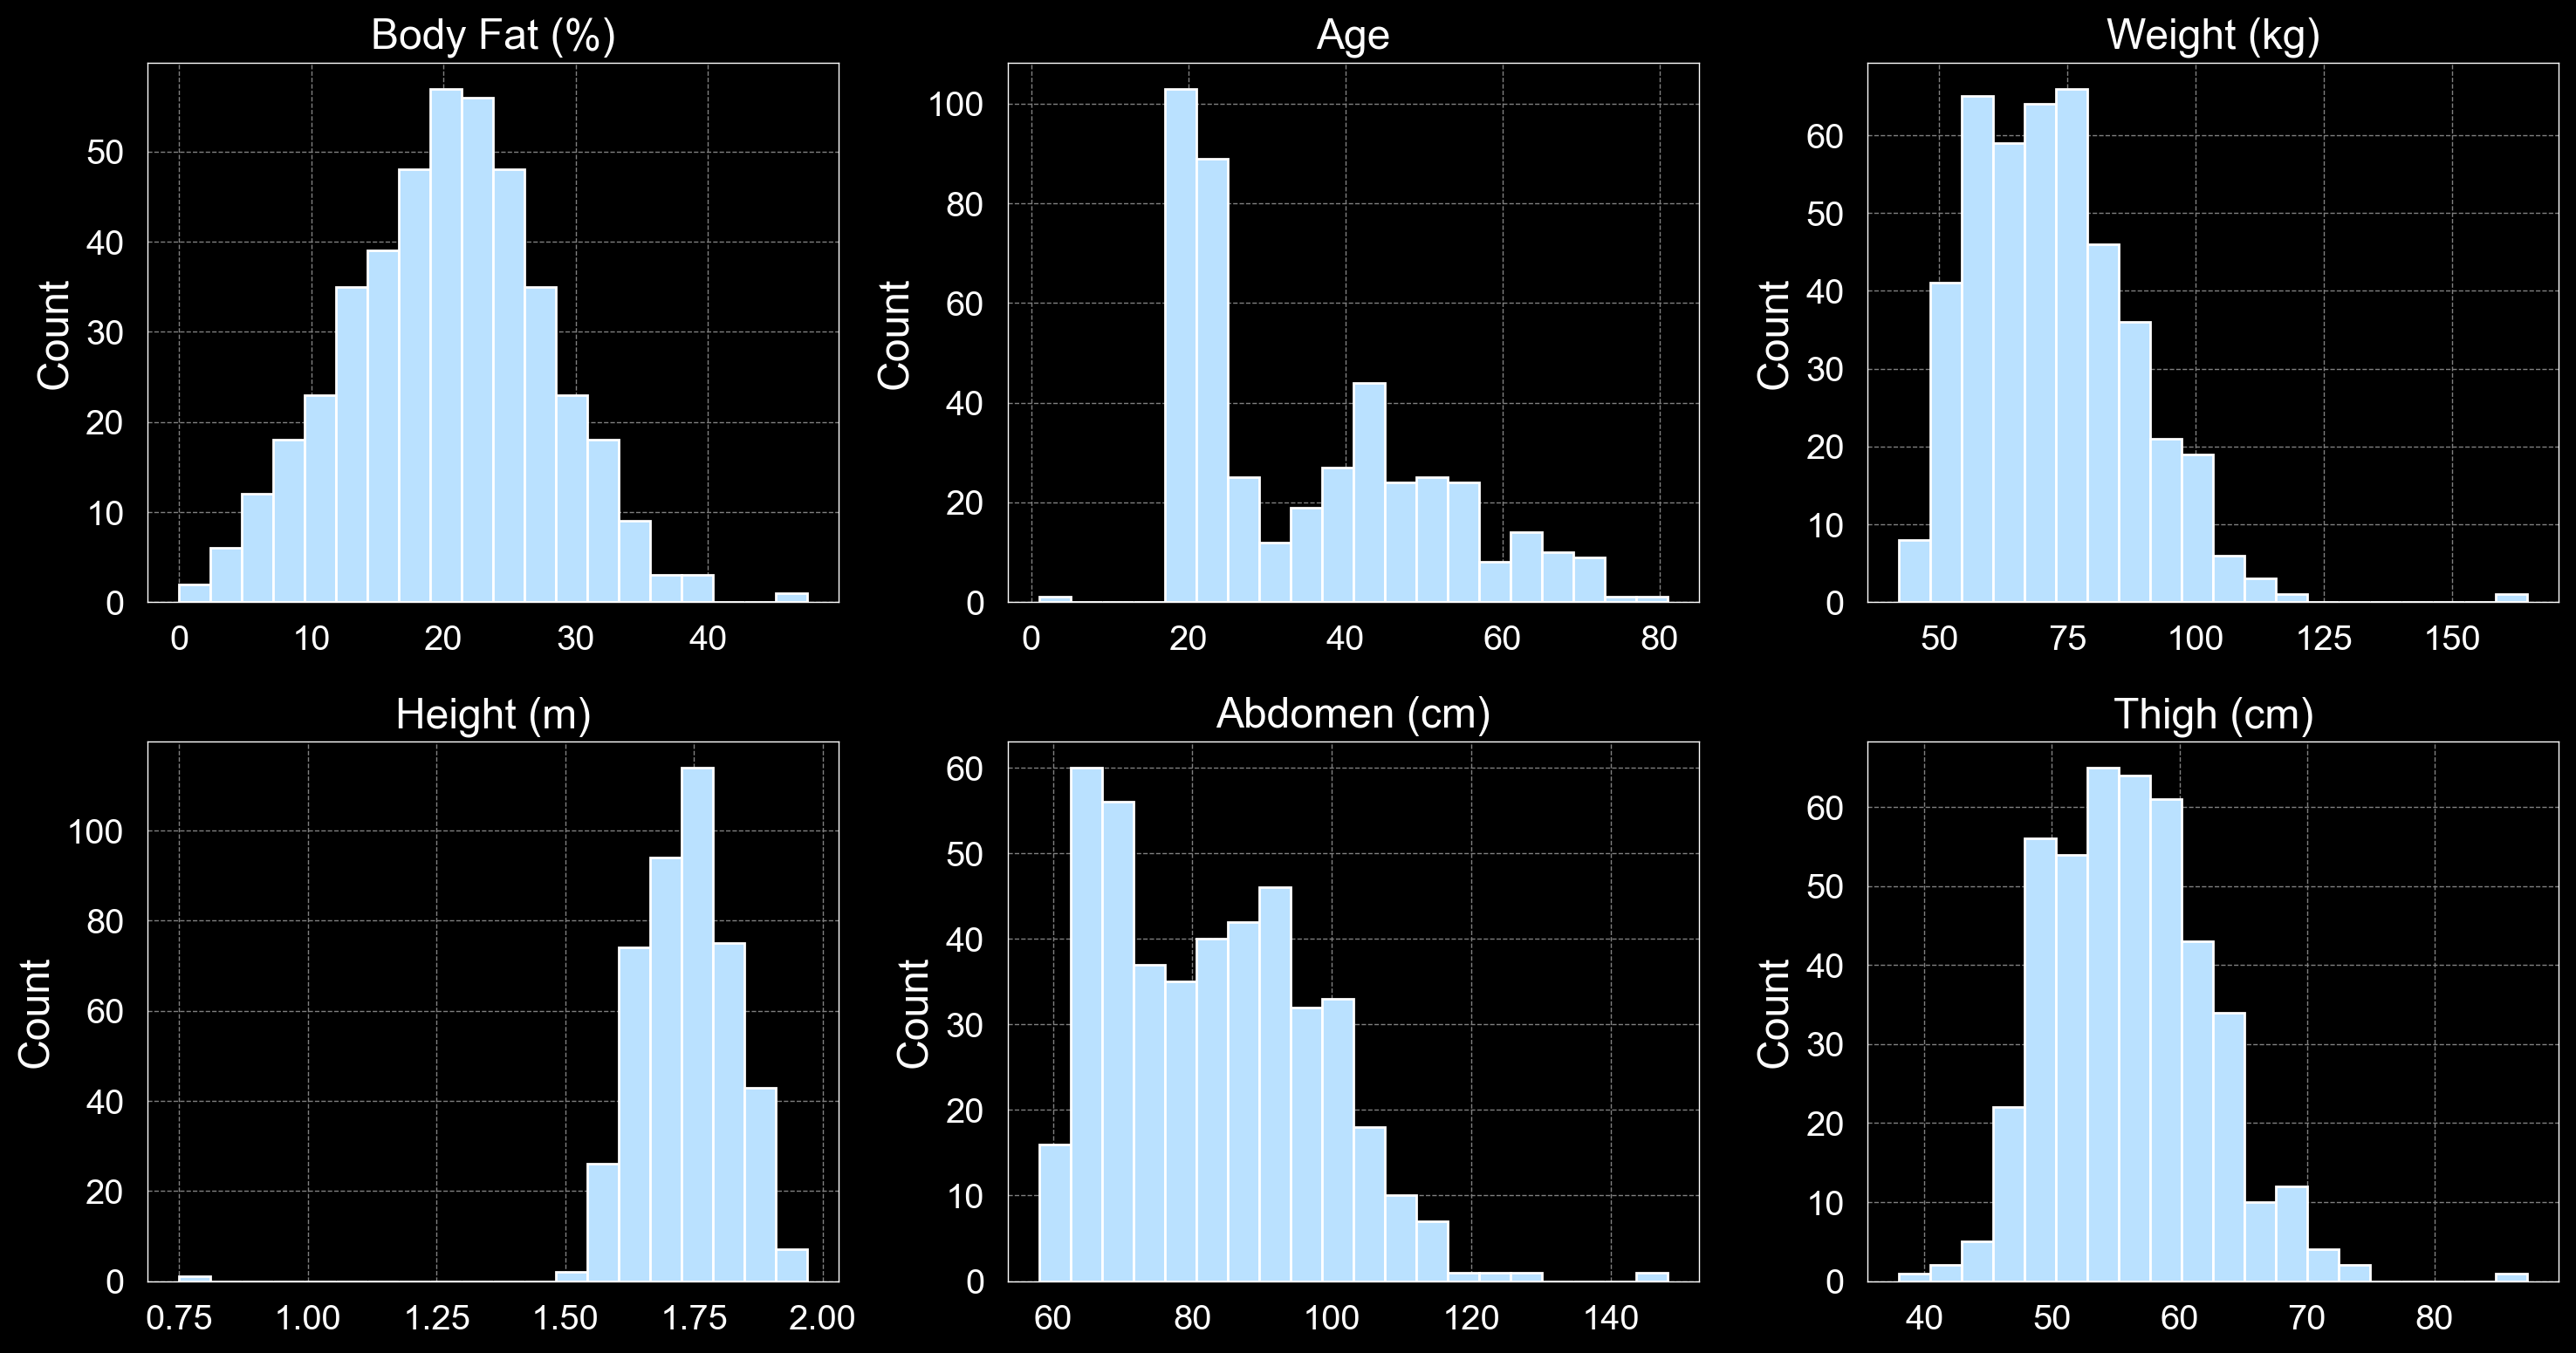

In [28]:
GENERAL_FEATURES = [
    ('BodyFat', 'Body Fat (%)'),
    ('Age', 'Age'),
    ('Weight', 'Weight (kg)'),
    ('Height', 'Height (m)'),
    ('Abdomen', 'Abdomen (cm)'),
    ('Thigh', 'Thigh (cm)')
]
 
fig, axes = create_grid(n_rows=2, n_columns=3)
 
for i, (feature, title) in enumerate(GENERAL_FEATURES):
    axes[i].hist(df[feature], bins=20)
    axes[i].set_ylabel("Count")
    axes[i].set_title(title)
 
plt.tight_layout()
plt.show()

We have some outliers in the Height and Weight features, but those can be just some extreme values from the participants. We can also use box plots to to have a better look at the outliers in the numerical features:

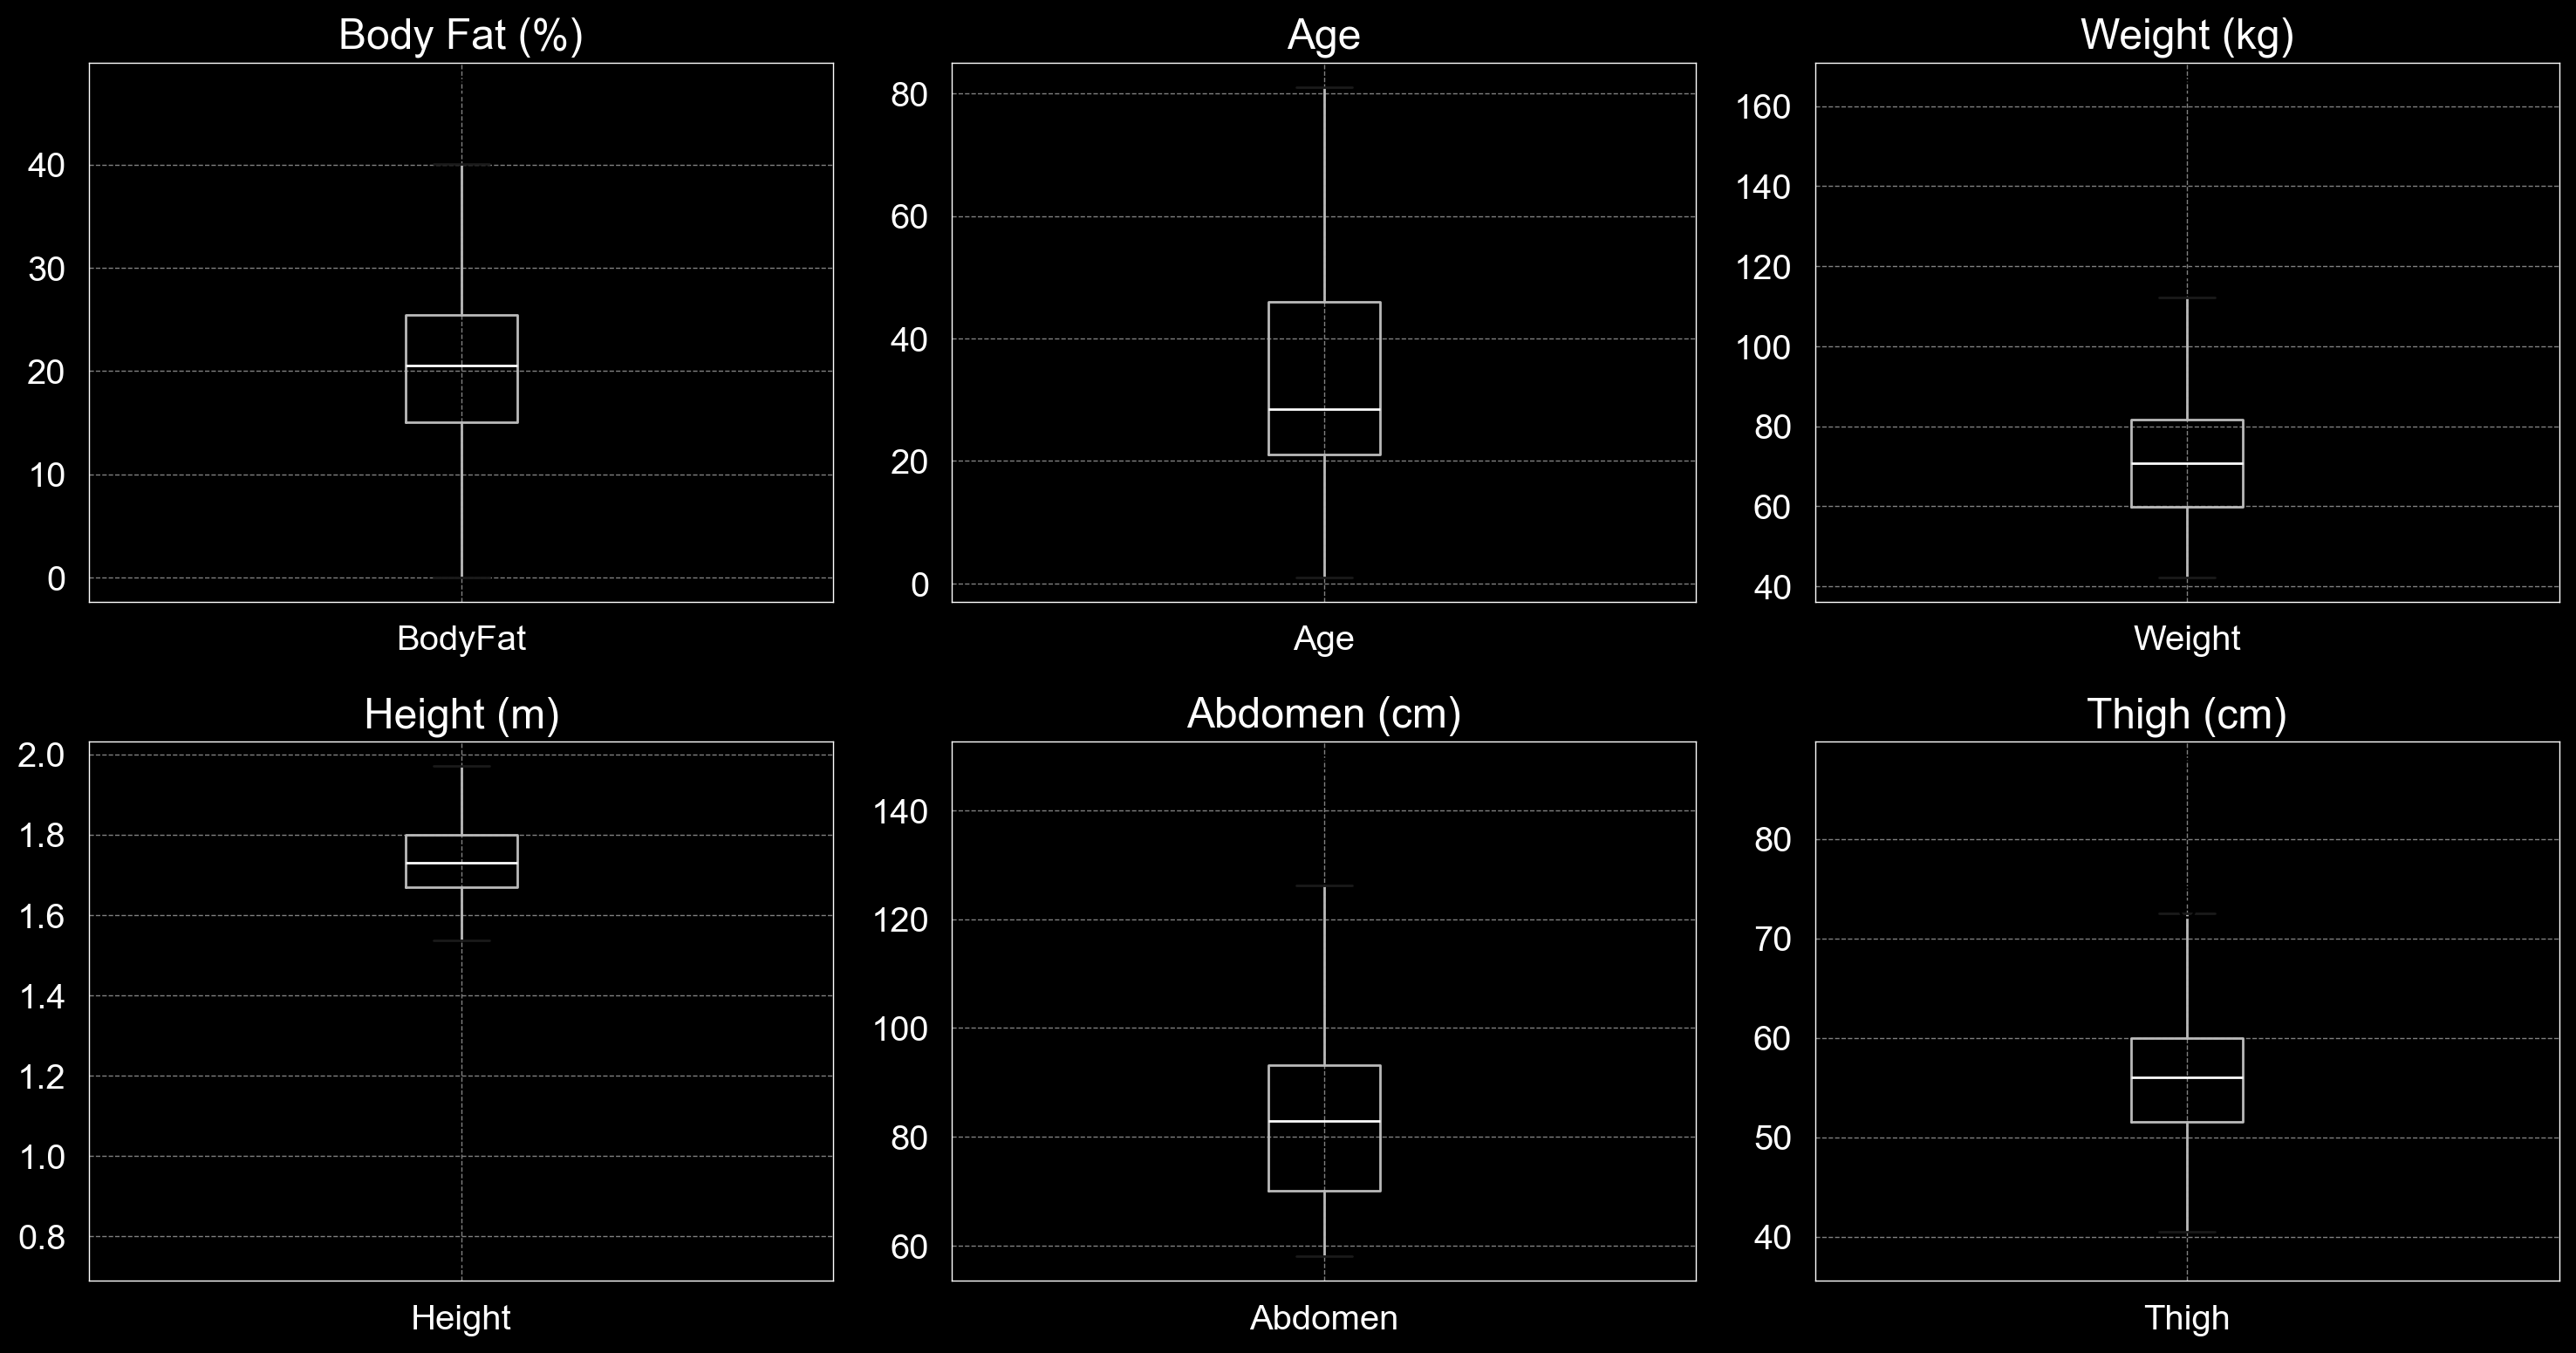

In [29]:
fig, axes = create_grid(n_rows=2, n_columns=3)
 
for i, (column, title) in enumerate(GENERAL_FEATURES):
    df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(title)
 
plt.tight_layout()
plt.show()

Let's have a look at the same features but according to participant gender:

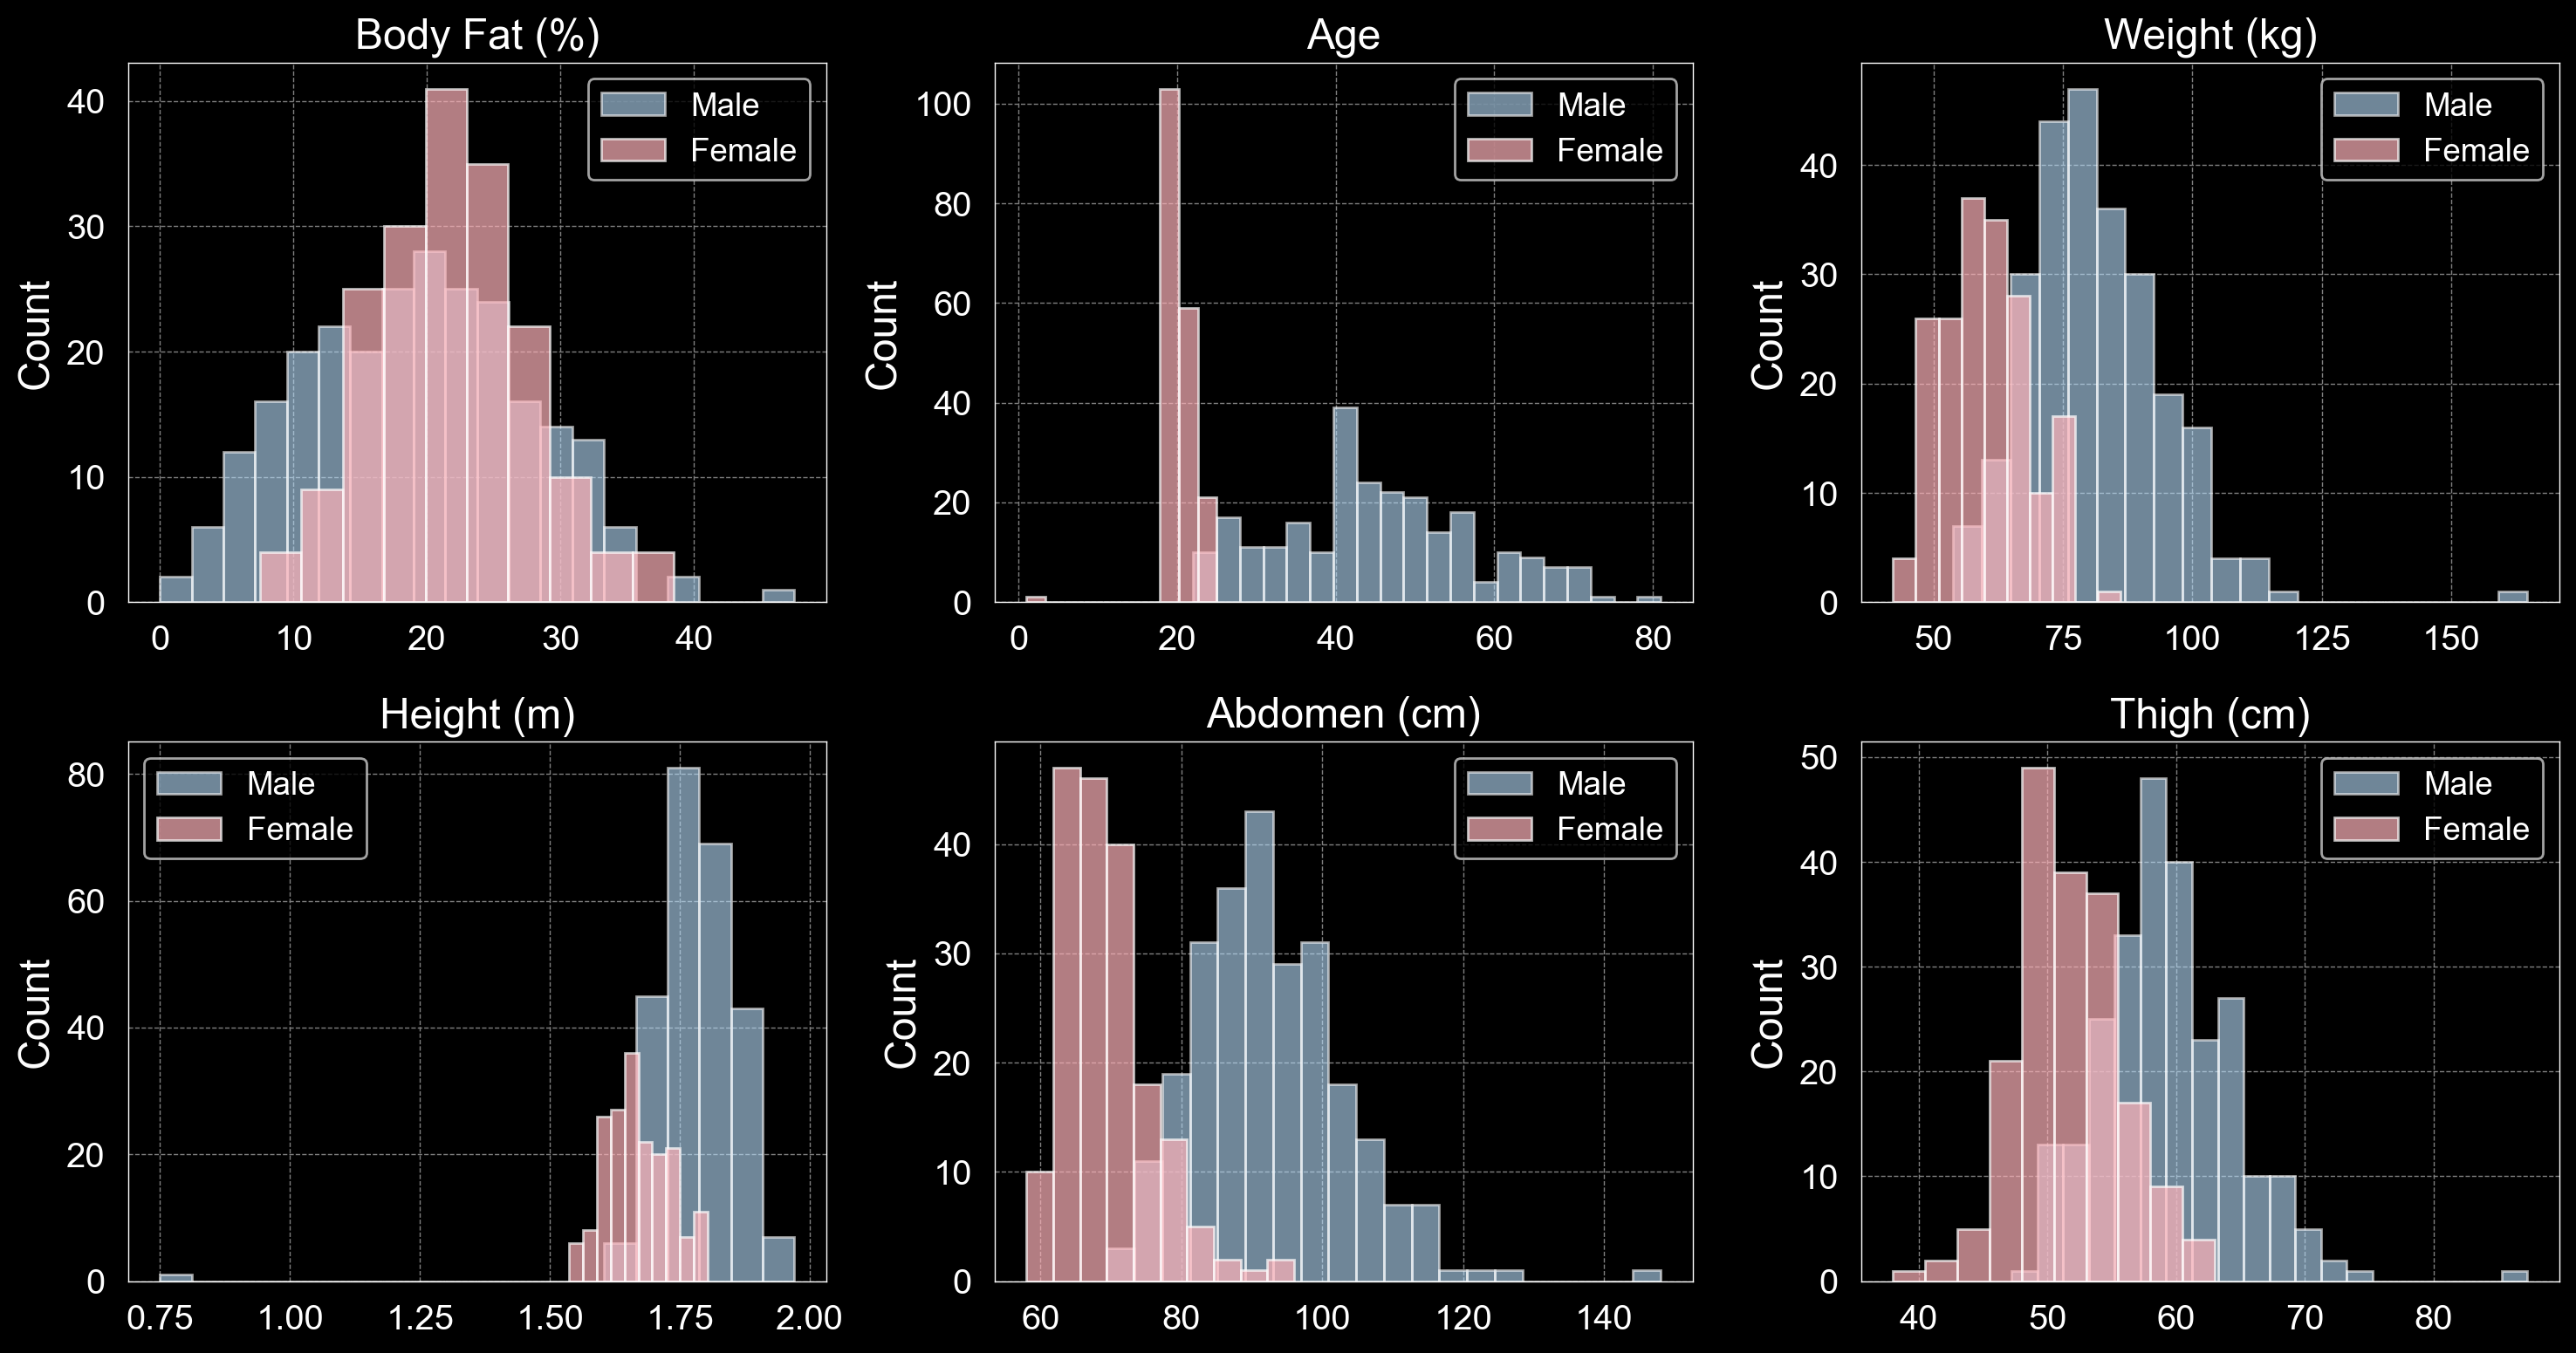

In [34]:
fig, axes = create_grid(n_rows=2, n_columns=3)
 
for i, (feature, title) in enumerate(GENERAL_FEATURES):
    males = df[df["Sex"] == "M"][feature]
    females = df[df["Sex"] == "F"][feature]
 
    axes[i].hist(males, bins=20, alpha=0.6, label="Male")
    axes[i].hist(females, bins=10, alpha=0.7, label="Female")
 
    axes[i].set_ylabel("Count")
    axes[i].set_title(title)
    axes[i].legend()
 
plt.tight_layout()
plt.show()

All outliers belong to male participants. Generally, females have lower values for Height, Weight and Abdomen. Note that the BodyFat for females is nicely centered around 20%, while males have a much wider distribution. Finally, let's have a look at the correlation matrix between the numerical features:

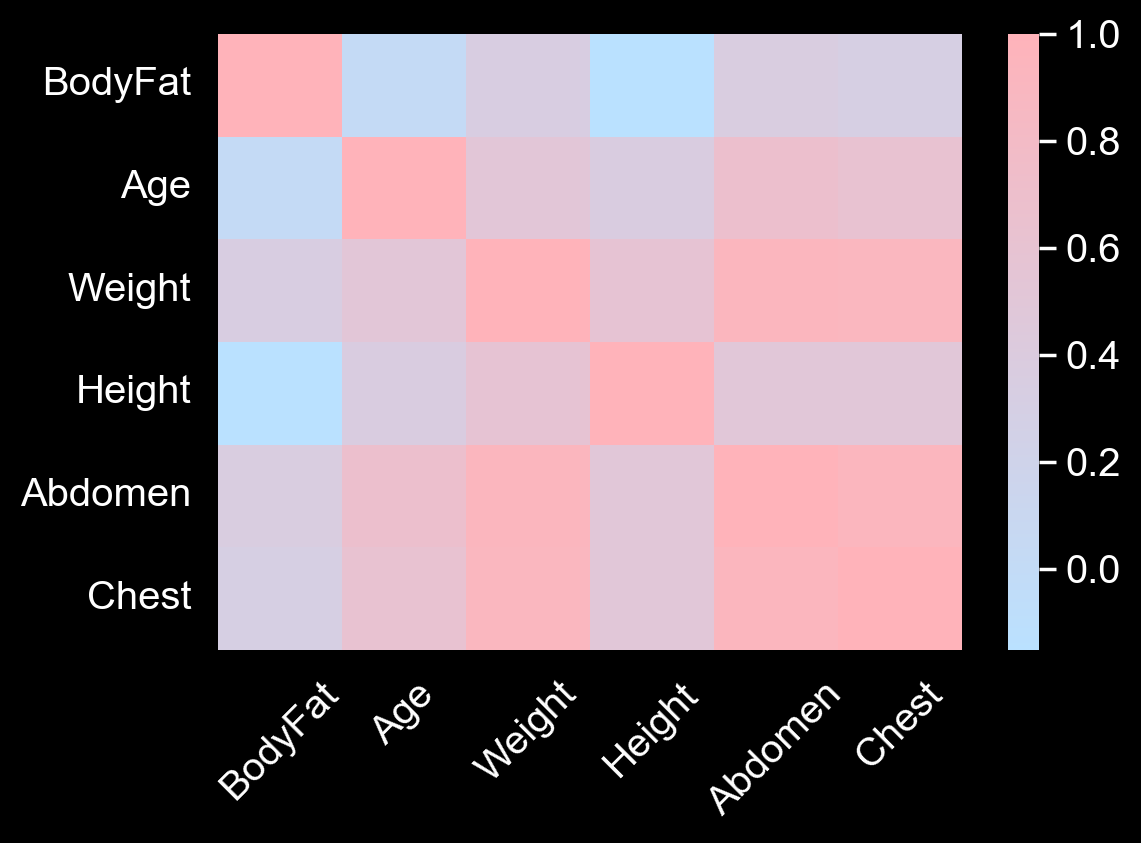

In [37]:
_, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(
    df[["BodyFat", "Age", "Weight", "Height", "Abdomen", "Chest"]].corr(
        numeric_only=True
    ),
    cmap=cmap,
    ax=ax,
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

The Abdomen and Chest measurements are highly correlated with BodyFat, which makes sense.

## Feature Engineering


- **Body Mass Index (BMI)**: Calculate BMI as following. BMI is a common measure that might correlate well with body fat.

$${Weight (kg) \over Height (m)^{2}}$$


- **Body Adiposity Index (BAI)**: A body fat estimate using `Hip` and `Height`:
  
  $${Hip \over Height^{1.5}}-18$$
  
- **Waist to Hip Ratio (WHR)**: This is another indicator of health and is calculated as 

$${Waist \over Hip}$$


In [38]:
df["BMI"] = df["Weight"] / (df["Height"] ** 2)
df["BAI"] = (df["Hip"] / (df["Height"] ** 1.5)) - 18
df["WHR"] = df["Abdomen"] / df["Hip"]

Let's look at our new features distribution:

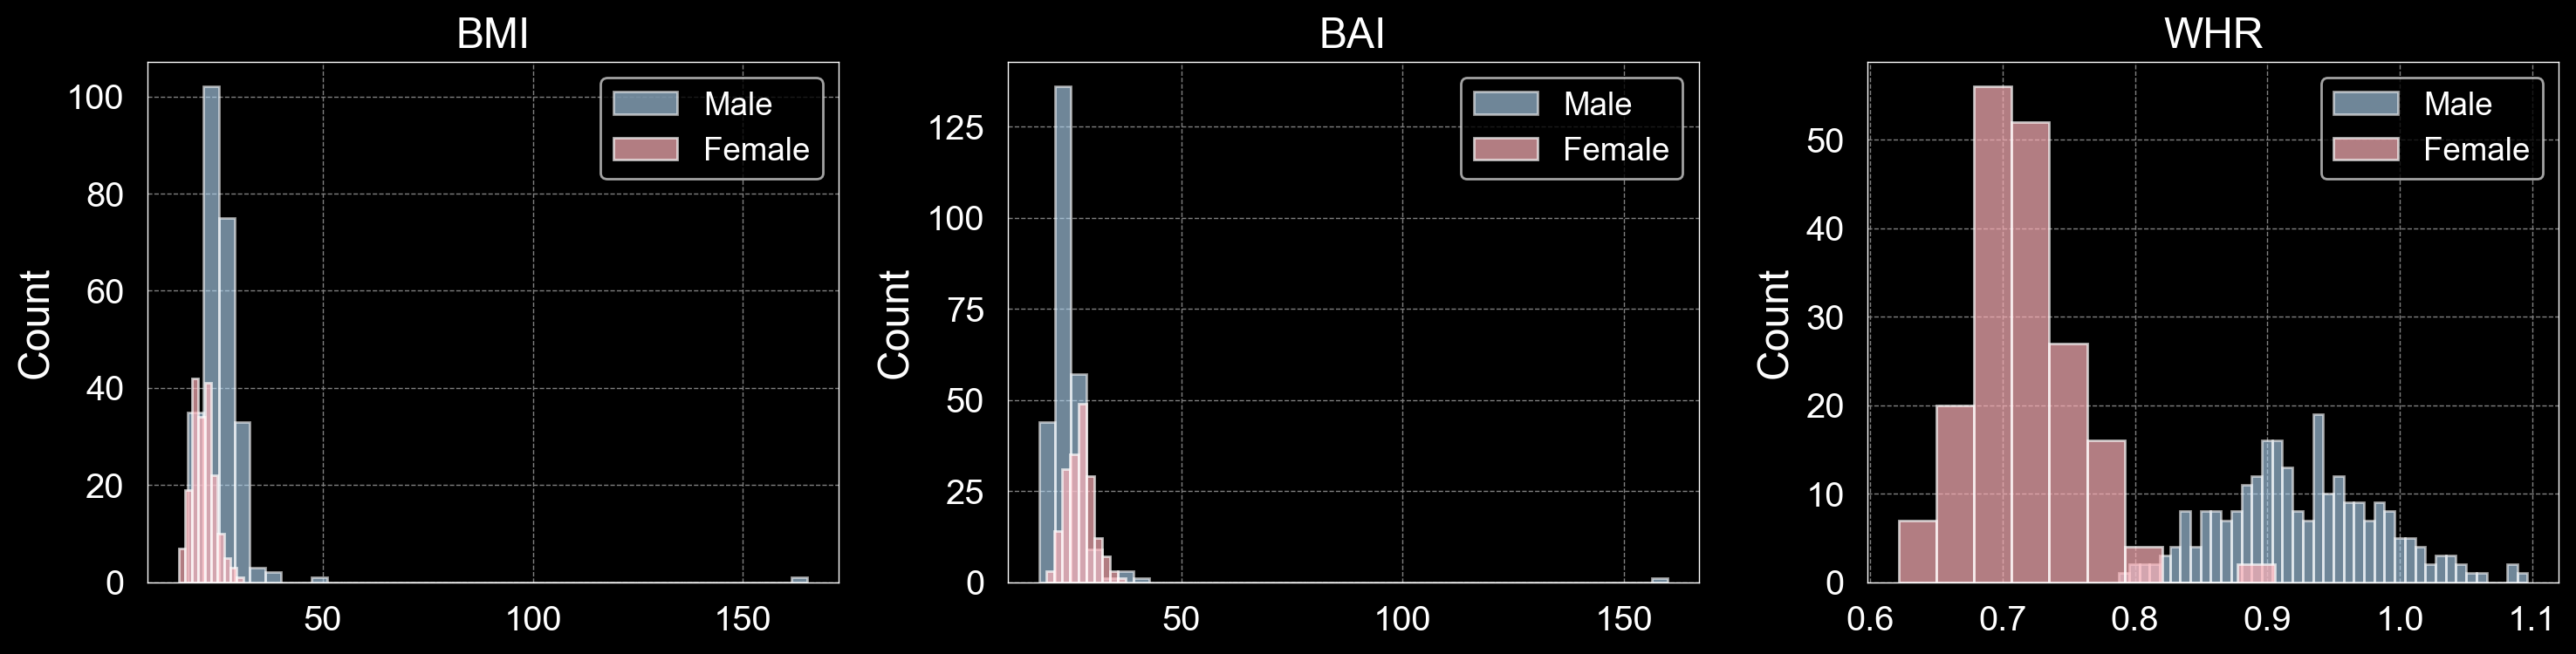

In [40]:
features = [("BMI", "BMI"), ("BAI", "BAI"), ("WHR", "WHR")]
 
fig, axes = create_grid(n_rows=1, n_columns=3)
 
for i, (feature, title) in enumerate(features):
    males = df[df["Sex"] == "M"][feature]
    females = df[df["Sex"] == "F"][feature]
 
    axes[i].hist(males, bins=40, alpha=0.6, label="Male")
    axes[i].hist(females, bins=10, alpha=0.7, label="Female")
 
    axes[i].set_ylabel("Count")
    axes[i].set_title(title)
    axes[i].legend()
 
plt.tight_layout()
plt.show()

## Feature Importance


split the data into features and target:

In [41]:
X = df.drop("BodyFat", axis=1)
y = df["BodyFat"]

use one-hot encoding to transform the sex feature into a binary variable (0 or 1):

In [46]:
!pip install scikit-learn 

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 10.0 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/11.0 MB 24.7 MB/s eta 0:00:01
   ----------- ---------------------------- 3.2/11.0 MB 25.6 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/11.0 MB 20.6 MB/s eta 0:00:01
   -------------------- ------------------- 5.7/11.0 MB 24.4 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.0 MB 27.0 MB/s eta 0:00:01
   ----------------------------------- ---- 9.8/11.0 MB 29.9 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.0 MB 34.4 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 29.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   -


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: C:\Users\shijie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [48]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_features = encoder.fit_transform(df[["Sex"]])
encoded_features = pd.DataFrame(
    encoded_features, columns=encoder.get_feature_names_out(["Sex"])
)
X_encoded = pd.concat([X.drop("Sex", axis=1), encoded_features], axis=1)

In [51]:
print(X_encoded.columns)

Index(['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh',
       'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'BMI', 'BAI', 'WHR',
       'Sex_F', 'Sex_M'],
      dtype='object')


I'll use the features to train a ExtraTreesRegressor from scikit-learn to estimate the importance of each feature:

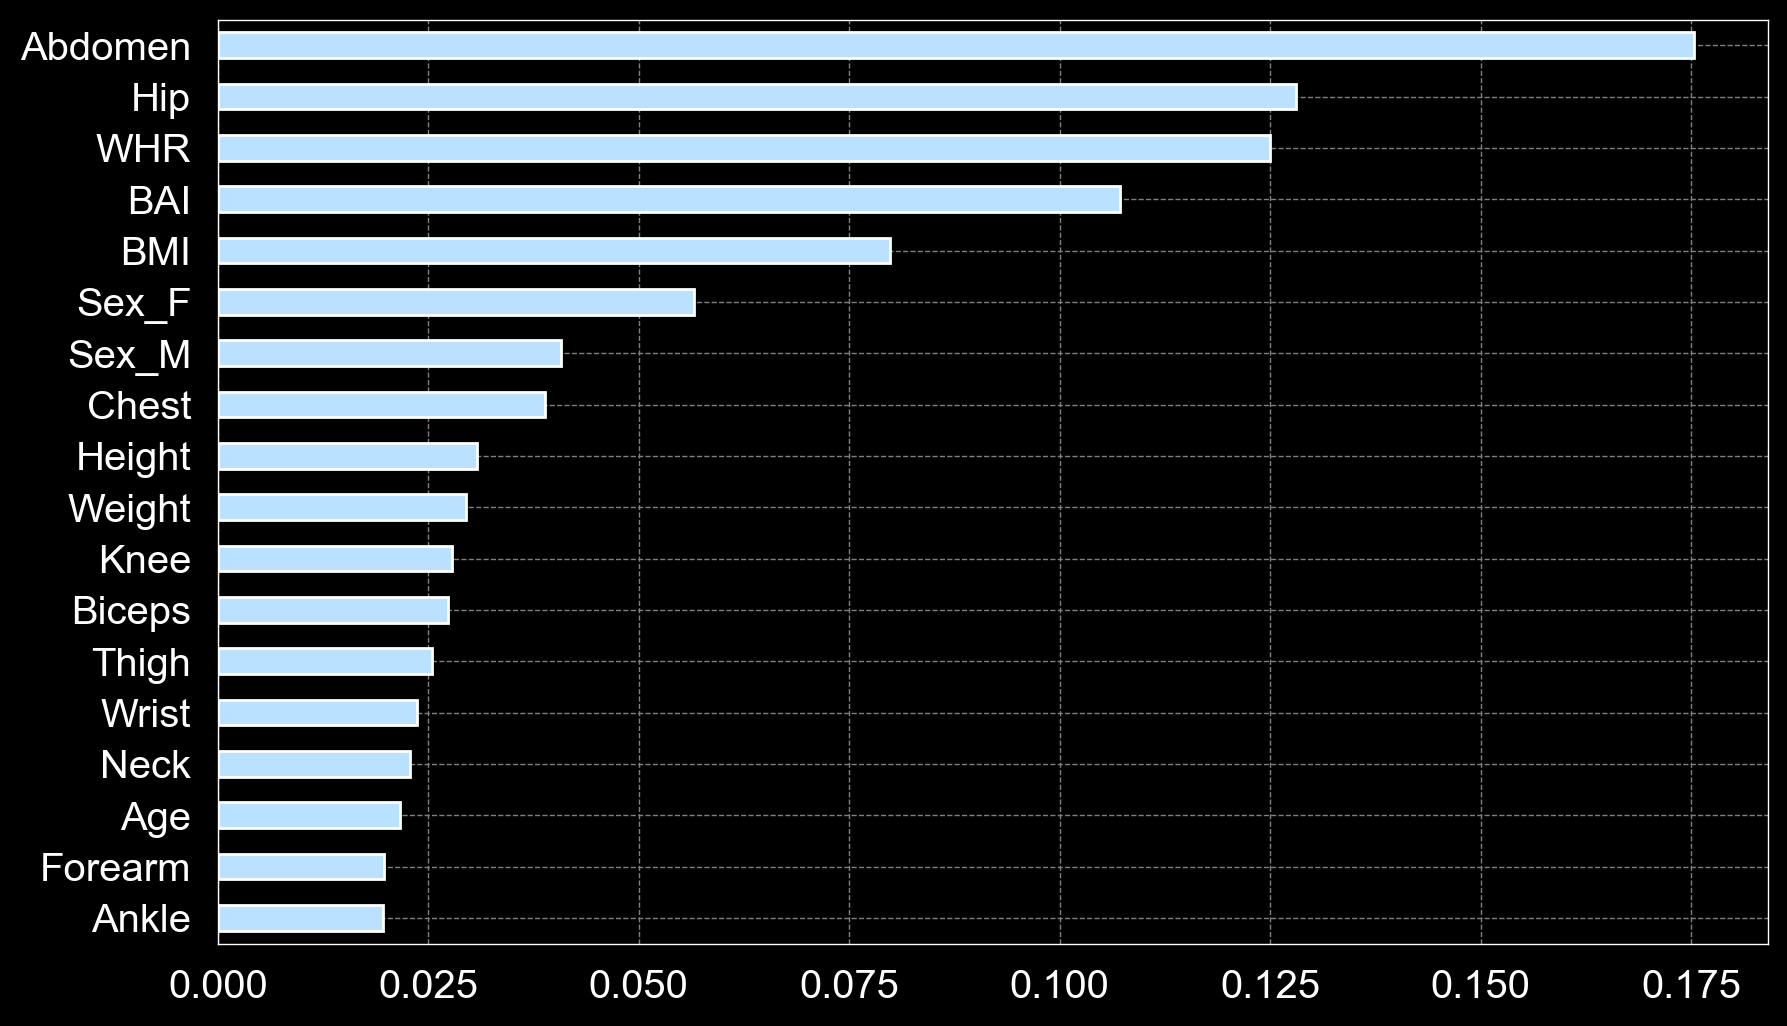

In [53]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X_encoded, y)
 
plt.figure(figsize=(10, 6))
importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
importances.sort_values(ascending=True).plot(kind="barh")
plt.show()

### Why 'ExtraTreesRegressor'? 



It introduces more randomness in the selection of split points within each feature. This randomness can help in reducing the variance of the model's feature importance scores, leading to more stable and reliable importance measures.

Besides, considering our not large dataset, the model is likely to overfit if we use a DecisionTreeRegressor or RandomForestRegressor. 

Finally, ExtraTreesRegressor does not use bootstrap sampling by default. Instead, it uses the whole dataset to grow each tree, which means it can take advantage of the entire dataset to build trees.

The most important features are Abdomen and Hip measurements (and their derived features). Let's look at how much of the predictive power is explained by the top 5 features:

In [54]:
top_k = 5
importances.sort_values(ascending=False)[:top_k].sum()

0.6154558993836082

## Save Processed Data


Finally, we'll save the data along with new features to a new SQLite database:



In [55]:
connection = sqlite3.connect("bodyfat-new-features.db")
df.to_sql("bodyfat", connection, index=False)

436